# Import libraries 

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree #Decision tree--eager learner
from sklearn.ensemble import RandomForestClassifier #ensemble model
from sklearn.neighbors import KNeighborsClassifier #lazy learner
from sklearn.preprocessing import StandardScaler, LabelEncoder #preprocessing
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score,cross_validate#training and testing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
#import warnings
#warnings.filterwarnings('ignore')

# Data exploration process

In [66]:
#Load and assemble the data
diabete_data = pd.read_csv('diabetes_data_upload.csv')

In [67]:
#Examine the data
diabete_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [68]:
diabete_data.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [69]:
diabete_data.tail(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
510,67,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
511,66,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
512,43,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative
513,62,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
514,54,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [70]:
#checking what type of data we have and if they contain missing values
diabete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [71]:
# checking size of our data
diabete_data.shape

(520, 17)

In [72]:
# statistic summary of my data
diabete_data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [73]:
#features of our data
features = list(diabete_data.columns)
features.remove('Age')
print(features)

['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


In [74]:
# transforming string element to quantitative values
labelEncoder = LabelEncoder()
for feature in features:
    diabete_data[feature] = labelEncoder.fit_transform(diabete_data[feature])
    
diabete_data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [75]:
diabete_data.info()#check datatype again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   weakness            520 non-null    int32
 6   Polyphagia          520 non-null    int32
 7   Genital thrush      520 non-null    int32
 8   visual blurring     520 non-null    int32
 9   Itching             520 non-null    int32
 10  Irritability        520 non-null    int32
 11  delayed healing     520 non-null    int32
 12  partial paresis     520 non-null    int32
 13  muscle stiffness    520 non-null    int32
 14  Alopecia            520 non-null    int32
 15  Obesity             520 non-null    int32
 16  class               520 non-null    int32
dt

Text(0, 0.5, 'gender')

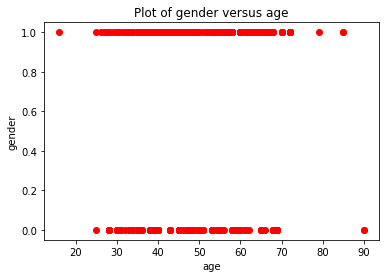

In [76]:
# scatter plot between age feature with age 
plt.scatter(diabete_data.iloc[:,0],diabete_data.iloc[:,1],color='red')
plt.title("Plot of gender versus age")
plt.xlabel('age')
plt.ylabel('gender')

Text(0, 0.5, 'polyuria')

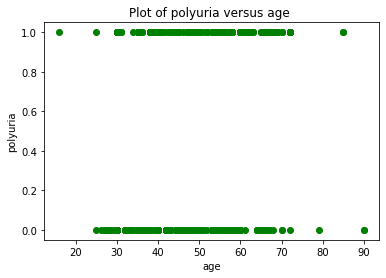

In [77]:
# scatter plot between age feature withpolyuria
plt.scatter(diabete_data.iloc[:,0],diabete_data.iloc[:,2],color='green')
plt.title("Plot of polyuria versus age ")
plt.xlabel('age')
plt.ylabel('polyuria')

Text(0, 0.5, 'Polydipsia ')

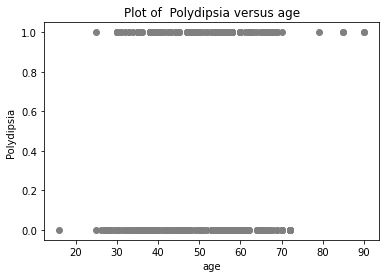

In [78]:
plt.scatter(diabete_data.iloc[:,0],diabete_data.iloc[:,3],color='grey')
plt.title("Plot of  Polydipsia versus age")
plt.xlabel('age')
plt.ylabel('Polydipsia ')

Text(0, 0.5, 'polyuria')

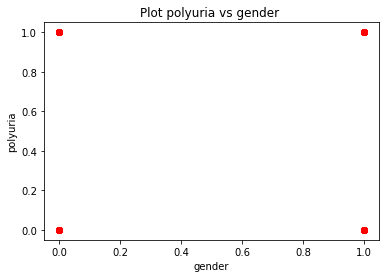

In [79]:
plt.scatter(diabete_data.iloc[:,1],diabete_data.iloc[:,2],color='red')
plt.title("Plot polyuria vs gender ")
plt.xlabel('gender')
plt.ylabel('polyuria')

# checking performance of models using splitted data

# extracting and splitting data

In [80]:
X_diabete=diabete_data.drop("class",axis=1)#all attributes except the last one
y_diabete=diabete_data['class']
X_train,X_test,y_train,y_test=train_test_split(X_diabete,y_diabete,test_size=0.3)

# scaling data

In [81]:
scaler=StandardScaler() #scales data to unit variance
X_train=scaler.fit_transform(X_train) #computes mean and stdev and then uses this to transorm data
X_test=scaler.transform(X_test)

# Random forest classifier model

In [82]:
random_f=RandomForestClassifier(n_estimators=100)
random_f.fit(X_train, y_train)
y_rfpred=random_f.predict(X_test)
y_rfpred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0])

In [83]:
precision_rf,recall_rf,f1score_rf,weight=precision_recall_fscore_support(y_test,y_rfpred,average='weighted')
print(f' Random forest: Precision = {precision_rf}, recall = {recall_rf}, f1-score = {f1score_rf}')

 Random forest: Precision = 0.9871794871794872, recall = 0.9871794871794872, f1-score = 0.9871794871794872


# KNN model

In [84]:
knnmodel_diabete=KNeighborsClassifier(n_neighbors=6, p=2,metric='chebyshev')
knnmodel_diabete.fit(X_train, y_train)
y_knn_pred=knnmodel_diabete.predict(X_test)
y_knn_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0])

In [85]:
precision_knn,recall_knn,f1score_knn,weight=precision_recall_fscore_support(y_test,y_knn_pred,average='weighted')
print(f'KNN model: Precision = {precision_knn}, recall = {recall_knn}, f1-score = {f1score_knn}')

KNN model: Precision = 0.8162280757217467, recall = 0.8076923076923077, f1-score = 0.8086462148962149


# Logistic regession model

In [86]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train, y_train)
y_log_pred=logistic_model.predict(X_test)
y_log_pred


array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0])

In [87]:
precision_log,recall_log,f1score_log,weight=precision_recall_fscore_support(y_test, y_log_pred,average='weighted')
print(f' Logistic regression: Precision = {precision_log}, recall = {recall_log}, f1-score = {f1score_log}')

 Logistic regression: Precision = 0.8922075986029474, recall = 0.8910256410256411, f1-score = 0.8912847250073526


# Presicion metric comparison of models

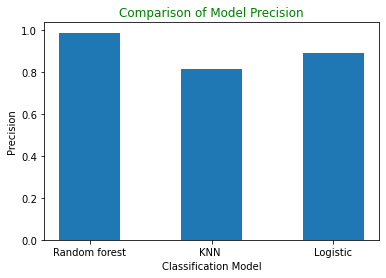

In [88]:
precisions_list=[precision_rf,precision_knn,precision_log]
Metrics_name=['Random forest','KNN ','Logistic']
plt.bar(Metrics_name,precisions_list, width = 0.5)
plt.xlabel("Classification Model")
plt.ylabel("Precision")
plt.title("Comparison of Model Precision", color='green')
plt.show()

# Recall metric comparison

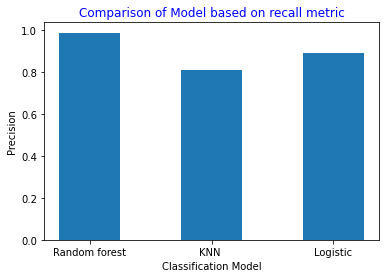

In [89]:
recall_list=[recall_rf,recall_knn,recall_log]
plt.bar(Metrics_name,recall_list, width = 0.5)
plt.xlabel("Classification Model")
plt.ylabel("Precision")
plt.title("Comparison of Model based on recall metric", color='blue')
plt.show()

# F1-sore comparison

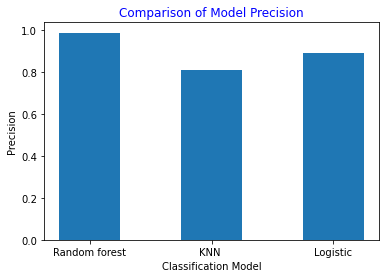

In [90]:
fscore_list=[f1score_rf,f1score_knn,f1score_log]
plt.bar(Metrics_name,fscore_list, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Classification Model", color='black')
plt.ylabel("Precision", color='black')
plt.title("Comparison of Model Precision", color='blue')
plt.show()

# ii) cross validation.

# Random forest model using cross validation

In [91]:
#set the number of splits (k)
k=10
random_f2 =RandomForestClassifier(n_estimators=100)

cv_rf_Score = cross_validate(random_f2, X_diabete, y_diabete, scoring = ['recall_weighted', 'precision_weighted', 'f1_weighted'],cv=k)

scores = list(cv_rf_Score.keys())

recall_rf_cv = cv_rf_Score[scores[2]].mean()
precision_rf_cv = cv_rf_Score[scores[3]].mean()
f1_score_rf_cv = cv_rf_Score[scores[4]].mean()

print(f' Random Forest: Precision = {precision_rf_cv}, recall = {recall_rf_cv}, f1-score = {f1_score_rf_cv}')

 Random Forest: Precision = 0.9810125923878047, recall = 0.9807692307692306, f1-score = 0.9807428177409416


# KNN model model using cross validation

In [92]:

knnmodel_diabete2 = KNeighborsClassifier(n_neighbors=6, p=2,metric='chebyshev')

cv_knn_Score = cross_validate(knnmodel_diabete2, X_diabete, y_diabete, scoring = ['recall_weighted', 'precision_weighted', 'f1_weighted'],cv=k)

scores = list(cv_knn_Score.keys())

recall_knn_cv = cv_knn_Score[scores[2]].mean()
precision_knn_cv = cv_knn_Score[scores[3]].mean()
f1_score_knn_cv = cv_knn_Score[scores[4]].mean()
#print(key)
print(f' KNN: Precision = {precision_knn_cv}, recall = {recall_knn_cv}, f1-score = {f1_score_knn_cv}')

 KNN: Precision = 0.8156956339739427, recall = 0.7846153846153847, f1-score = 0.7846233736098263


# Logistic regression  model using cross validation

In [93]:
logistic_model2=LogisticRegression(max_iter = 250)

cv_log_Score = cross_validate(logistic_model2, X_diabete, y_diabete, scoring = ['recall_weighted', 'precision_weighted', 'f1_weighted'],cv=k)

scores = list(cv_log_Score.keys())

recall_log_cv = cv_log_Score[scores[2]].mean()
precision_log_cv = cv_log_Score[scores[3]].mean()
f1_score_log_cv = cv_log_Score[scores[4]].mean()

print(f' Logistic Regression: Precision = {precision_log_cv}, recall = {recall_log_cv}, f1-score = {f1_score_log_cv}')

 Logistic Regression: Precision = 0.9350171457992161, recall = 0.9307692307692307, f1-score = 0.9306680011683296


# Comparison of models using precision as metric while using cross validation

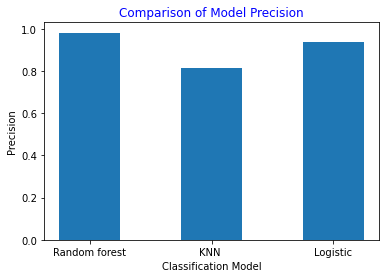

In [94]:
precisions_list_cv=[precision_rf_cv,precision_knn_cv,precision_log_cv]
plt.bar(Metrics_name,precisions_list_cv, width = 0.5)
plt.xlabel("Classification Model")
plt.ylabel("Precision")
plt.title("Comparison of Model Precision", color='blue')
plt.show()

# Comparison of models using recall as metric while using cross validation

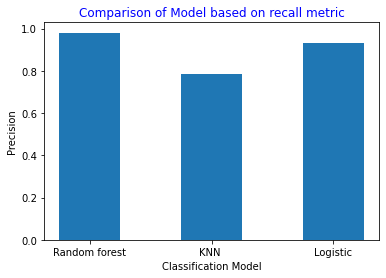

In [95]:
recall_list_cv = [recall_rf_cv,recall_knn_cv,recall_log_cv]
plt.bar(Metrics_name,recall_list_cv, width = 0.5)
plt.xlabel("Classification Model", color='black')
plt.ylabel("Precision", color='black')
plt.title("Comparison of Model based on recall metric", color='blue')
plt.show()

# Comparison of models using F1-score as metric while using cross validation

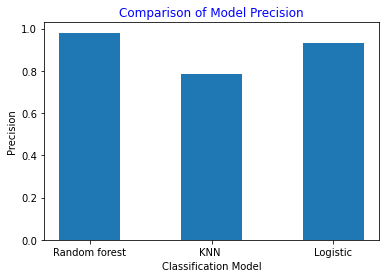

In [96]:
f1_score_list_cv=[f1_score_rf_cv,f1_score_knn_cv,f1_score_log_cv]
plt.bar(Metrics_name,f1_score_list_cv, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Classification Model")
plt.ylabel("Precision", color='black')
plt.title("Comparison of Model Precision", color='blue')
plt.show()